File found! Loading data...


C:\Users\ikers\AppData\Local\Temp\ipykernel_1420\4211701818.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Fill missing values


Plotting total sales over time...


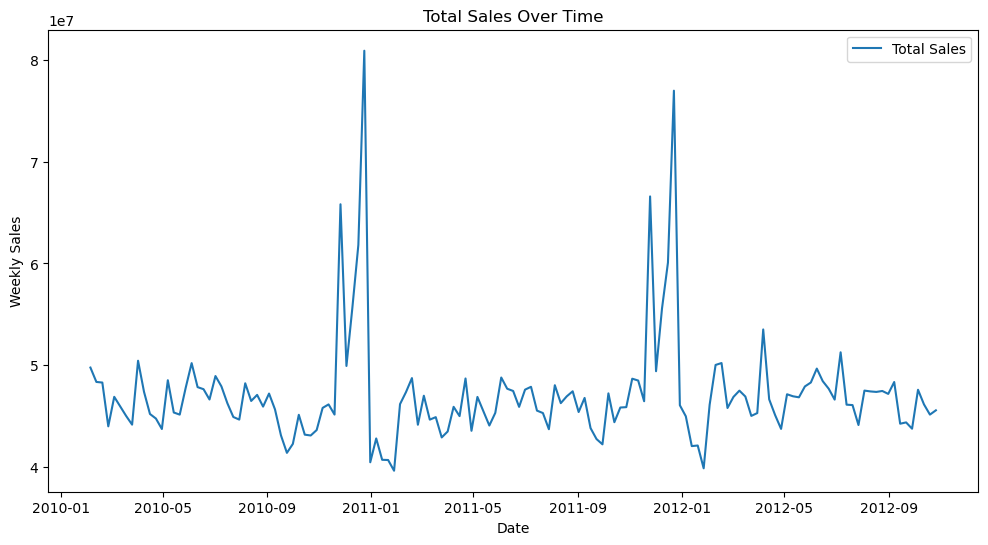

Calculating holiday vs non-holiday sales...
Average Holiday Sales: $17035.82
Average Non-Holiday Sales: $15901.45
Preparing data for Prophet...


12:33:06 - cmdstanpy - INFO - Chain [1] start processing
12:33:07 - cmdstanpy - INFO - Chain [1] done processing


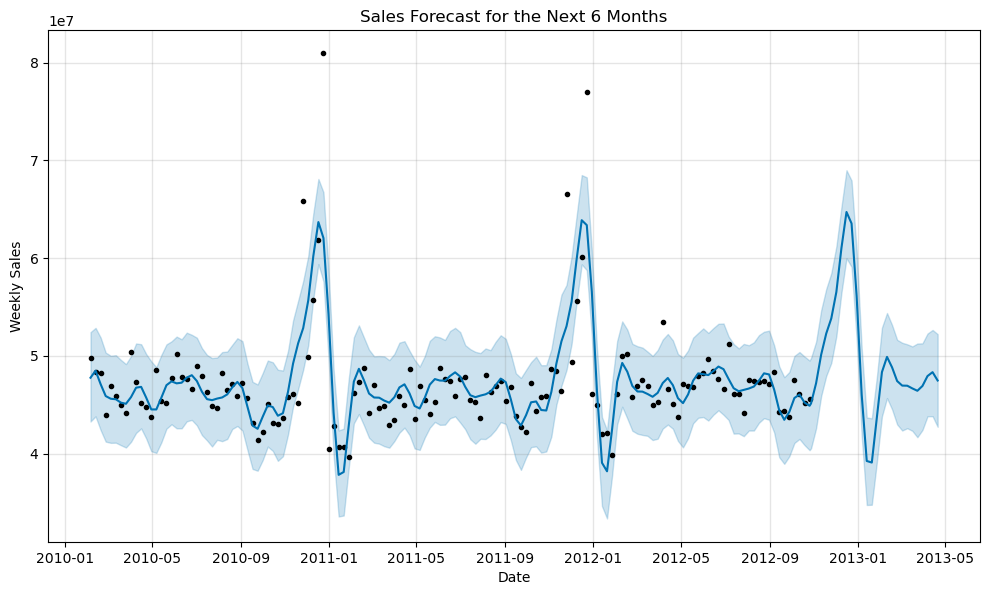

Mean Absolute Error: $2030644.86


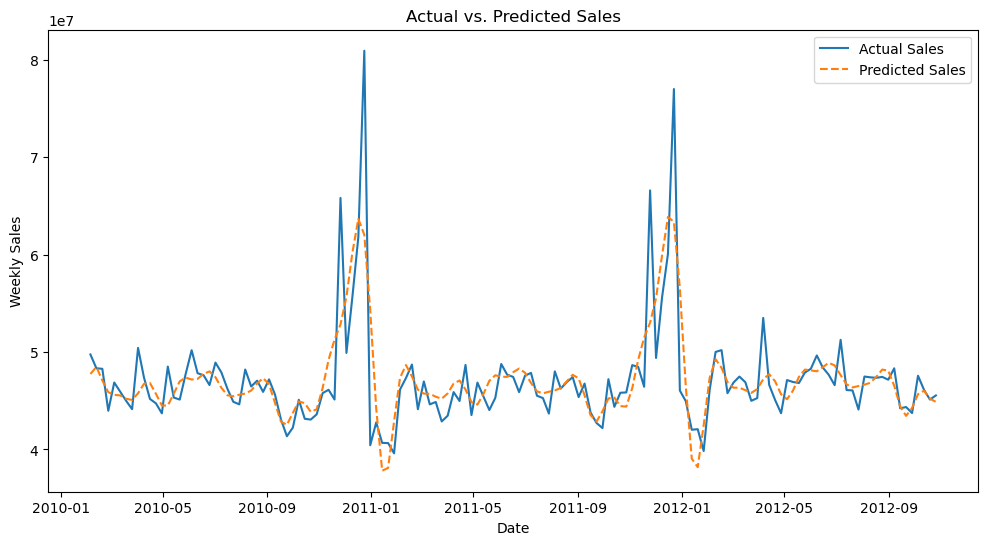

SUCCESS! Project completed.


In [9]:
# ====== STEP 1: INSTALL DEPENDENCIES ======
!pip install pandas matplotlib prophet plotly --quiet
import os
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error

# ====== STEP 2: LOAD AND CLEAN DATA ======
file_path = r"C:\Users\ikers\OneDrive\Desktop\Sales_Forecast\sales_data.csv"

# Check if the file exists
if not os.path.isfile(file_path):
    print(f"ERROR: File not found at {file_path}. Check the path or download the dataset from Kaggle.")
else:
    print("File found! Loading data...")
    # Load data
    df = pd.read_csv(file_path)
    
    # Check if 'Date' column exists
    if 'Date' not in df.columns:
        print(f"ERROR: 'Date' column not found. Columns in your dataset: {list(df.columns)}")
    else:
        # Clean data
        df['Date'] = pd.to_datetime(df['Date'])  # Fix dates
        df = df.fillna(method='ffill')  # Fill missing values
        
        # ====== STEP 3: EXPLORE DATA ======
        print("Plotting total sales over time...")
        total_sales = df.groupby('Date')['Weekly_Sales'].sum()
        plt.figure(figsize=(12, 6))
        plt.plot(total_sales.index, total_sales.values, label='Total Sales')
        plt.title('Total Sales Over Time')
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.legend()
        plt.show()
        
        # Check for holiday sales (skip if column doesn't exist)
        try:
            if 'IsHoliday' in df.columns:
                print("Calculating holiday vs non-holiday sales...")
                holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales'].mean()
                non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales'].mean()
                print(f"Average Holiday Sales: ${holiday_sales:.2f}")
                print(f"Average Non-Holiday Sales: ${non_holiday_sales:.2f}")
        except KeyError:
            print("No holiday column found. Skipping holiday analysis.")
        
        # ====== STEP 4: PREPARE DATA FOR PROPHET ======
        print("Preparing data for Prophet...")
        prophet_df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
        prophet_df.columns = ['ds', 'y']  # Prophet requires columns named 'ds' (date) and 'y' (value)
        
        # ====== STEP 5: TRAIN MODEL ======
        model = Prophet()
        model.fit(prophet_df)
        
        # ====== STEP 6: PREDICT NEXT 6 MONTHS ======
        future = model.make_future_dataframe(periods=26, freq='W')  # 26 weeks = ~6 months
        forecast = model.predict(future)
        
        # ====== STEP 7: VISUALIZE RESULTS ======
        # Static plot
        model.plot(forecast)
        plt.title('Sales Forecast for the Next 6 Months')
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.show()
        
        # Interactive plot (optional)
        try:
            plot_plotly(model, forecast)
        except:
            print("Plotly not installed. Run `!pip install plotly` for interactive plots.")
        
        # ====== STEP 8: EVALUATE MODEL ======
        actual = prophet_df['y']
        predicted = forecast['yhat'][:len(actual)]
        mae = mean_absolute_error(actual, predicted)
        print(f"Mean Absolute Error: ${mae:.2f}")
        
        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(prophet_df['ds'], actual, label='Actual Sales')
        plt.plot(prophet_df['ds'], predicted, label='Predicted Sales', linestyle='--')
        plt.title('Actual vs. Predicted Sales')
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        plt.legend()
        plt.show()

        print("SUCCESS! Project completed.")